In [1]:
%autosave 10
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve , precision_recall_curve , roc_auc_score , auc

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
df = pd.read_csv(r"D:\Technocolabs\Mini Projects\Mini Project 2\cleaned_data.csv")
# df.columns.to_list()
# df.dtypes
# df.drop(columns = 'ID' , inplace = True)
# df.EDUCATION_CAT.value_counts()
# df.groupby("EDUCATION_CAT")['LIMIT_BAL'].sum()
# df.EDUCATION_CAT.map({"graduate school" : 4 , "university" : 3 , "high school" : 2 , "others" : 1 })
# y = df.EDUCATION_CAT
# X = df.drop(columns = "EDUCATION_CAT")

X1 = df[["LIMIT_BAL"]]
y = df["default payment next month"]
X2 = df[["EDUCATION"]]
x_train , x_test , y_train , y_test = train_test_split(X1 , y , random_state = 6 , train_size = 0.8)
x_train2 , x_test2 , y_train2 , y_test2 =  train_test_split(X2 , y , random_state = 6 , train_size = 0.8)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [3]:
classifier1 = LogisticRegression()
classifier2 = LogisticRegression()
classifier1.fit(x_train, y_train)
classifier2.fit(x_train2 , y_train2)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [4]:
predictions1 = classifier1.predict_proba(x_test)
predictions2 = classifier2.predict_proba(x_test2)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [5]:
roc_score = roc_auc_score(y_test,predictions1[:,1])
roc_score = roc_auc_score(y_test2,predictions2[:,1])

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

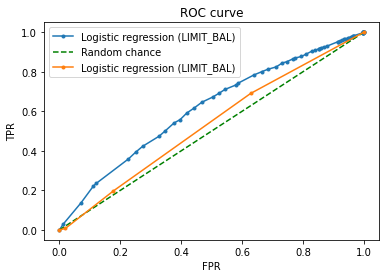

In [6]:
fpr, tpr, thresholds = roc_curve(y_test,predictions1[:,1])
fpr2, tpr2, threshold2 = roc_curve(y_test2,predictions2[:,1])
plt.plot(fpr, tpr, '.-')
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr2, tpr2, '.-')
plt.legend(['Logistic regression (LIMIT_BAL)', 'Random chance' , 'Logistic regression (LIMIT_BAL)' ])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [7]:
# We can directly plot the precision recall graph without calculating any thing also as it is a binary classification problem
# plot_precision_recall_curve(classifier, x_test, y_test)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Prisicion Recall Vurve')

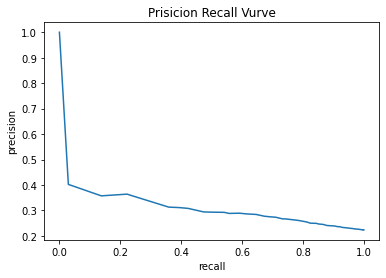

In [9]:
recall,precision, thresholds = precision_recall_curve(y_test,predictions1[:,1])
plt.plot(precision , recall)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Prisicion Recall Vurve")

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [10]:
auc_precision_recall = auc(precision , recall)
auc_precision_recall

0.313059534496646

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [12]:
y_train_probs = classifier1.predict_proba(x_train)
roc_score = roc_auc_score(y_train,y_train_probs[:,1])
roc_score

0.6202358954868216

    How is this different, conceptually and quantitatively, from your earlier calculation?
